In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

movies = pd.read_csv("movies.csv")
dict = {}
x = 0

# splitting the genres and putting them in a dictionary
for i in range(len(movies)):
    arr = movies.genres[i].split('|')
    for j in arr:
        if (j not in dict):
            dict[j] = x
            x+=1
            
print (dict)


{'Adventure': 0, 'Animation': 1, 'Children': 2, 'Comedy': 3, 'Fantasy': 4, 'Romance': 5, 'Drama': 6, 'Action': 7, 'Crime': 8, 'Thriller': 9, 'Horror': 10, 'Mystery': 11, 'Sci-Fi': 12, 'War': 13, 'Musical': 14, 'Documentary': 15, 'IMAX': 16, 'Western': 17, 'Film-Noir': 18, '(no genres listed)': 19}


In [32]:
# we make columns in movies for each genre with value 0
for i in dict:
    if (i!='(no genres listed)'):
        movies[i] = [0]*len(movies)

# we put 1 if the movie is of this genre, else 0
for i in range(len(movies)):
    arr = movies.genres[i].split('|')
    for j in arr:
        if (j!='(no genres listed)'):
            movies[j][i] = 1
            
movies = movies.drop(['genres'],1)
print (movies.head())


C:\Users\elfat7\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


   movieId                               title  Adventure  Animation  \
0        1                    Toy Story (1995)          1          1   
1        2                      Jumanji (1995)          1          0   
2        3             Grumpier Old Men (1995)          0          0   
3        4            Waiting to Exhale (1995)          0          0   
4        5  Father of the Bride Part II (1995)          0          0   

   Children  Comedy  Fantasy  Romance  Drama  Action  ...  Thriller  Horror  \
0         1       1        1        0      0       0  ...         0       0   
1         1       0        1        0      0       0  ...         0       0   
2         0       1        0        1      0       0  ...         0       0   
3         0       1        0        1      1       0  ...         0       0   
4         0       1        0        0      0       0  ...         0       0   

   Mystery  Sci-Fi  War  Musical  Documentary  IMAX  Western  Film-Noir  
0        0       0

In [33]:
# making a copy of movies in X and scaling it for k-means
X = movies.copy()
X = X.drop(['title'],1)
sc = StandardScaler()
X = sc.fit_transform(X) 


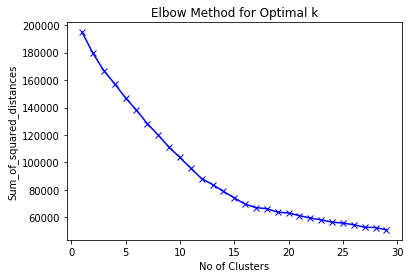

In [34]:
# make an elbow graph to help choose number of clusters
K = range(1,30)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

<bound method NDFrame.head of       movieId                                      title  Adventure  \
0           1                           Toy Story (1995)          1   
1           2                             Jumanji (1995)          1   
2           3                    Grumpier Old Men (1995)          0   
3           4                   Waiting to Exhale (1995)          0   
4           5         Father of the Bride Part II (1995)          0   
...       ...                                        ...        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)          0   
9738   193583               No Game No Life: Zero (2017)          0   
9739   193585                               Flint (2017)          0   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)          0   
9741   193609        Andrew Dice Clay: Dice Rules (1991)          0   

      Animation  Children  Comedy  Fantasy  Romance  Drama  Action  ...  \
0             1         1       1        1

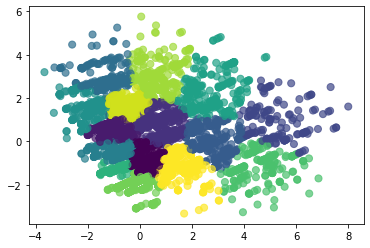

In [36]:
# using k-means on our data to cluster them and using PCA to draw it in 2 dimensions
model = KMeans(n_clusters=15).fit(X)



# Determine the cluster labels of new_points: labels
movies['cluster'] = model.predict(X)
print (movies.head)

pca = PCA(n_components = 2) 
X = pca.fit_transform(X)

plt.scatter (X[ : , 0], X[ : , 1],  c= model.labels_, s=50, alpha=0.7)
plt.show()



In [37]:
import numpy as np
from sklearn import preprocessing 
import pandas as pd

ratings = pd.read_csv('ratings.csv')
print(ratings.head())
info={}

# summing the ratings in 0th index and counters in 1st index
for i in range(len(ratings)):
    x = ratings.movieId[i]
    if (x not in info):
        info[x] = [0,0,0,'']
    info[x][0] += ratings.rating[i]
    info[x][1] += 1

# adding cluster and titles in index 2 and index 3 
for i in range(len(movies)):
    x = movies.movieId[i]
    if (x not in info):
        info[x] = [0,0,0,'']
    info[x][2] = movies.cluster[i]
    info[x][3] = movies.title[i]
    
# putting average rating in 0th index
for x in info:
    if (info[x][1]!=0):
        info[x][0] /= info[x][1]
    



   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [38]:
# to_rec will have the movies we recommend to the user
to_rec = {}
watched = {}
# to avoid recommending a movie that was already watched
for i in range (len(ratings)):
    u = ratings.userId[i]
    to_rec[u] = []
    if u not in watched:
        watched[u] = [ratings.movieId[i]]
    else:
        watched[u] += [ratings.movieId[i]]


In [39]:
# recommending movies based on users preference
for i in range(len(ratings)):
    u = ratings.userId[i]
    m = ratings.movieId[i]
    r = ratings.rating[i]
    similar_rec = 0
    if r >= 4:
        cluster = info[m][2]
        for x in info:
            if ( info[x][2] == cluster and info[x][0]>=4 and len(to_rec[u])<10 and x not in watched[u] and x not in to_rec[u]):
                two += 1
                to_rec[u] += [x]
            if (len(to_rec[u])>=10 or similar_rec == 2):
                break
    


    

In [41]:
#printing the recommendations
for u in to_rec:
    print (u, end =": ")
    for e in to_rec[u]:
        print (info[e][3], end = "; ")
    print (" ")

1: Up (2009); Beauty and the Beast: The Enchanted Christmas (1997); Nut Job, The (2014); Fantastic Mr. Fox (2009); Partly Cloudy (2009); Lion King 1½, The (2004); Casper Meets Wendy (1998); Emperor's New Groove 2: Kronk's New Groove, The (2005); All Dogs Christmas Carol, An (1998); Stuart Little 3: Call of the Wild (2005);  
2: Welcome to Woop-Woop (1997); Living in Oblivion (1995); Bridge on the River Kwai, The (1957); Stand by Me (1986); This Is Spinal Tap (1984); I'm the One That I Want (2000); Party Girl (1995); The Hundred-Foot Journey (2014); Pretty One, The (2013); Magic Mike XXL (2015);  
3: Matrix, The (1999); Dark Knight, The (2008); Inception (2010); North by Northwest (1959); Captain Phillips (2013); Blade Runner (1982); Logan (2017); City of Lost Children, The (Cité des enfants perdus, La) (1995); Seven Sisters (2017); Raiders of the Lost Ark: The Adaptation (1989);  
4: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964); Beautiful Mind, A (2001); 